In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,10)

In [2]:
def sigmoid(x, beta):  # sigmoid function
    miu = 1 / (1 + np.exp(-beta * x))
    return miu

def gradient(x, y, beta):  # gradient g
    miu = sigmoid(x, beta)
    g = x.dot(miu.T - y.T)
    return g
    
def hessian(x, beta):  # hessian matrix H = XMX.T
    miu = sigmoid(x, beta).T
    diag = np.zeros((np.shape(miu)))
    for d in range(diag.shape[0]):
        diag[d] = miu[d].dot(1 - miu[d])  
    M = np.eye(diag.shape[0])*diag  # diagnose matrix
    h = x.dot(M).dot(x.T)
    return h

In [3]:
tmp = np.load("log-reg.npz")
#print(list(tmp.keys()))
X = (tmp["X"])  # 1*20
Y = (tmp["y"])  # 1*20

# 2 Comparison of Logistic to Linear Regression

#### i)

[[3.00068167]]


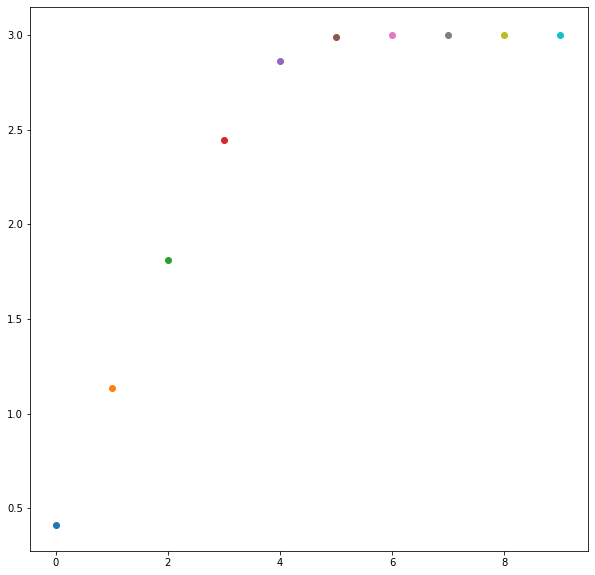

In [275]:
beta = random.random()  # initialize random beta

for ite in range(10):
    ## Iteratively Reweighted Least Squares : beta_new = beta_old - inv(H).g
    plt.scatter(ite, float(beta))
    beta = beta - np.linalg.inv(hessian(X, beta)).dot(gradient(X, Y, beta))
print(beta)

(-0.5, 2)

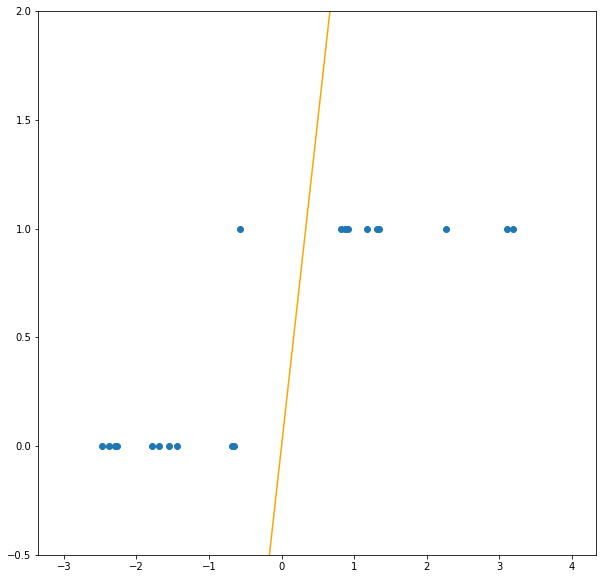

In [276]:
plt.scatter(X.ravel(), Y.ravel())
x = np.arange(-3, 4, 0.01)
plt.plot(x, x*float(beta), color='orange')
plt.ylim((-0.5, 2))

#### ii)

In [277]:
tmp = np.load("log-reg.npz")
X = (tmp["X"])  # 1*20
Y = (tmp["y"])  # 1*20
X = np.matrix(np.append(X, 10)) # X and Y append a number 10 and 1 respectively--- (10, 1) as outlier
Y = np.matrix(np.append(Y, 1))

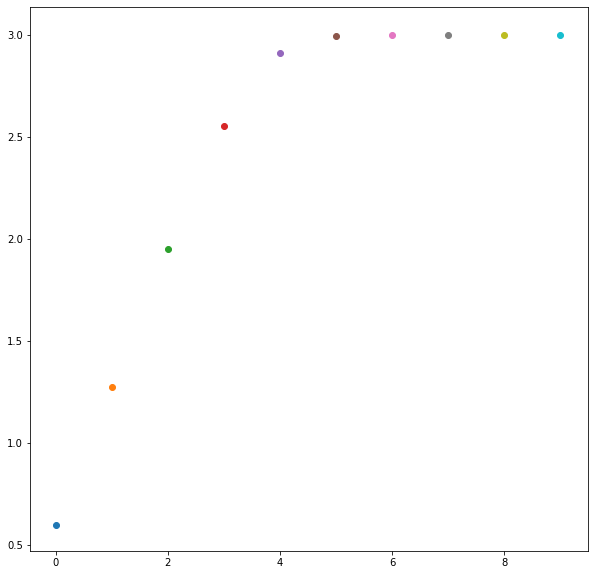

In [278]:
beta = random.random()  # initialize random beta

for ite in range(10):
    ## Iteratively Reweighted Least Squares : beta_new = beta_old - inv(H).g
    plt.scatter(ite, float(beta))
    beta = beta - np.linalg.inv(hessian(X, beta)).dot(gradient(X, Y, beta))

(-0.5, 1.5)

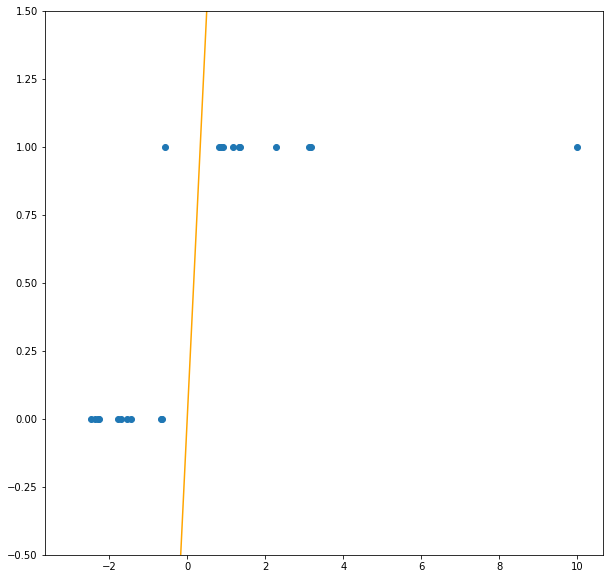

In [279]:
X = (tmp["X"])  # 1*20
Y = (tmp["y"])  # 1*20
X = np.append(X, 10) # X and Y append a number 10 and 1 respectively--- (10, 1) as outlier
Y = np.append(Y, 1)

plt.scatter(X.ravel(), Y.ravel())
x = np.arange(-3, 4, 0.01)
plt.plot(x, x*float(beta), color='orange')
plt.ylim((-0.5, 1.5))

Conlusion: logistic regression is not sensitive to outlier points

#### iii)

0.2186260644419044


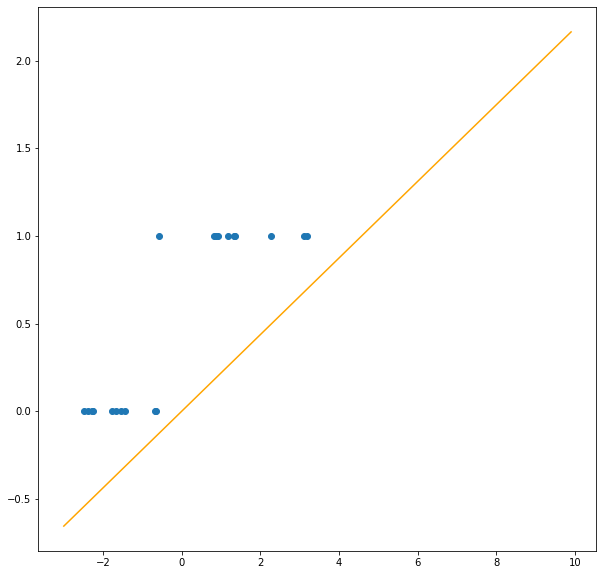

In [280]:
## linear regression
X = (tmp["X"])  # 1*20
Y = (tmp["y"])  # 1*20
plt.scatter(X.ravel(), Y.ravel())
beta_linreg = np.linalg.inv(np.mat(X).dot(np.mat(X).T)).dot(np.mat(X)).dot(np.mat(Y).T)
Xseq = np.arange(-3,10,0.1)
Y_OLS = float(beta_linreg) * Xseq
print(float(beta_linreg))
plt.plot(Xseq, Y_OLS, color='orange')

0.1471618180821888


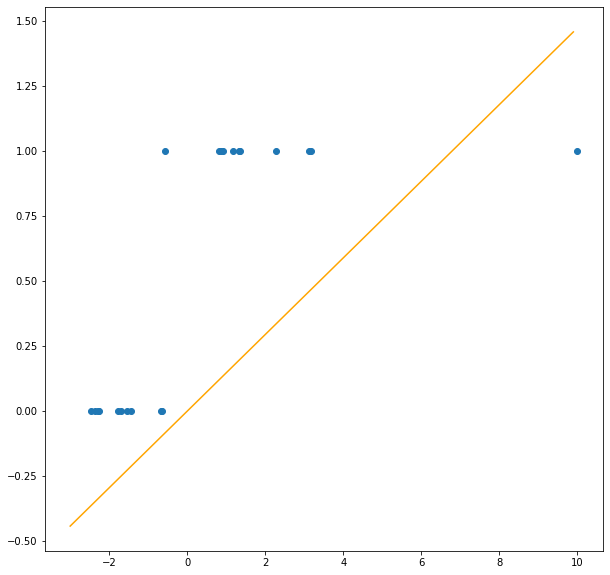

In [281]:
X = (tmp["X"])  # 1*20
Y = (tmp["y"])  # 1*20
X = np.append(X, 10)  # X and Y append a number 10 and 1 respectively--- (100, 1) as outlier
Y = np.append(Y, 1)
plt.scatter(X.ravel(), Y.ravel())
beta_linreg = np.linalg.inv(np.mat(X).dot(np.mat(X).T)).dot(np.mat(X)).dot(np.mat(Y).T)
Xseq = np.arange(-3,10,0.1)
Y_OLS = float(beta_linreg) * Xseq
print(float(beta_linreg))
plt.plot(Xseq, Y_OLS, color='orange')

# 3 Fitting Logistic Regression to multidimensional data

#### i)

In [4]:
tmp = np.load("log-reg2.npz")
#print(list(tmp.keys()))
X = np.matrix(tmp["X"])  # 2*100
Y = np.matrix(tmp["y"])  # 1*100

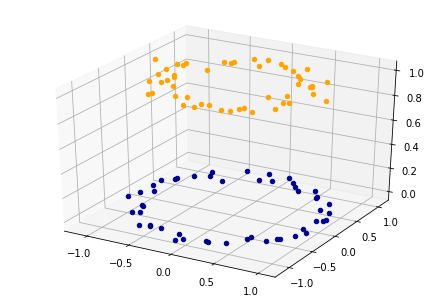

In [5]:
## plot the 3-D diagram
x1 = np.reshape(X[0], (-1, 1))
x2 = np.reshape(X[1], (-1, 1))
fig = plt.figure()
ax = Axes3D(fig)
for (x1_, x2_, y) in zip(x1, x2, Y.T):
    if int(y) == 0:
        ax.scatter(x1_, x2_, y, color="darkblue")
    else:
        ax.scatter(x1_, x2_, y, color="orange")

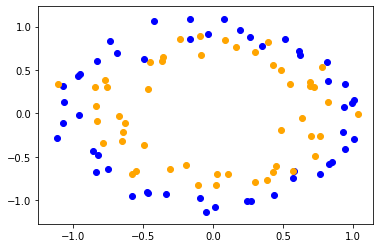

In [6]:
## plot the 2-D diagram
for (x1_, x2_, y) in zip(x1, x2, Y.T):
    if int(y) == 0:
        plt.scatter(float(x1_), float(x2_), color="blue")
    else:
        plt.scatter(float(x1_), float(x2_), color="orange")

#### ii)

In [70]:
X = (tmp["X"])  # 2*100
Y = (tmp["y"])  # 1*100

def create_features(X, degree=5):
    data = np.stack([X[0]**i * X[1]**(d-i) for d in range(0,degree) for i in range(d+1)])
    return data
data = create_features(X, 5)

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 3.59109882e-01 -6.97003978e-01 -1.16149227e-02 ...  5.34228474e-01
  -5.63280261e-01  9.09298258e-01]
 [ 6.94047442e-01  7.61547983e-01  1.03503023e+00 ...  7.74928111e-01
   8.51757683e-01 -3.31761282e-02]
 ...
 [ 6.21202262e-02  2.81750735e-01  1.44523580e-04 ...  1.71386612e-01
   2.30187208e-01  9.10047623e-04]
 [ 1.20059030e-01 -3.07841434e-01 -1.28788007e-02 ...  2.48605812e-01
  -3.48074904e-01 -3.32034691e-05]
 [ 2.32036674e-01  3.36348185e-01  1.14765706e+00 ...  3.60616557e-01
   5.26337410e-01  1.21144249e-06]]


#### iii)

In [68]:
beta = np.zeros((data.shape[0], 1))  # initialize beta

for ite in range(1):
    miu = (1 / (1 + np.exp(-beta.T.dot(data)))).T # calculate μ using sigmoid
    diag = np.zeros((np.shape(miu)))
    for d in range(diag.shape[0]):
        diag[d] = miu[d].dot(1 - miu[d])  
    M = np.eye(diag.shape[0])*diag # diagonal matrix
    g = data.dot(miu - Y.T) + 2*beta# gradient of regularized loss function(15*1)
    H = data.dot(M).dot(data.T) + np.ones(data.shape[0])# hessian matrix
    """
    Don't know the reason, if I use np.linalg.inv, always assert: Singular Matrix,
    so I use H.T / np.linalg.det(H) to compute the inverse matrix
    """
    beta = beta - (H.T / np.linalg.det(H)).dot(g)
beta

array([[-67.48029656],
       [ -0.74944689],
       [ -1.75148522],
       [-36.36189071],
       [ -5.11565091],
       [-34.09185433],
       [ -1.36065548],
       [ -5.01172548],
       [ -5.67462283],
       [ -1.15287113],
       [-30.27064476],
       [ -6.01382434],
       [-12.51750762],
       [ -5.13490158],
       [-28.32544674]])

In [71]:
print(1 / np.exp(-beta.T.dot(data)))

[[5.60104464e-45 1.04658947e-52 2.87397354e-61 1.01561551e-51
  7.42341411e-59 1.15418873e-38 1.91574605e-52 1.51354584e-49
  5.73749538e-50 7.41055407e-49 9.65353215e-45 2.07403714e-38
  4.06367406e-39 3.80646434e-40 2.61125066e-45 3.51207139e-63
  1.51304958e-37 2.46101186e-57 2.92634632e-59 6.98857938e-35
  1.83307320e-47 9.09778237e-71 4.26650590e-47 2.48695476e-46
  2.91711511e-54 1.11079229e-40 1.79620357e-37 4.08012999e-52
  2.16557353e-51 9.59293016e-42 1.92039871e-41 6.86343607e-53
  1.50968810e-46 6.76065722e-44 2.67049725e-67 1.46096729e-45
  4.87166720e-61 1.01111741e-41 4.15636401e-49 1.64048779e-40
  1.65156075e-40 2.49523010e-45 1.26570950e-45 3.89187432e-43
  1.76791236e-45 4.79499660e-40 1.66984343e-45 3.32690667e-59
  3.62647582e-67 4.66502661e-45 2.60120435e-40 1.45371925e-49
  2.74723549e-48 5.61657554e-45 5.22150127e-40 2.68806325e-55
  4.30655962e-59 1.60153714e-42 1.75627474e-39 5.90953420e-44
  1.97220724e-64 5.83697619e-63 5.10236255e-56 1.01413026e-60
  8.8247

In [61]:
miu = (1 / (1 + np.exp(-beta.T.dot(data)))).T # calculate μ using sigmoid
diag = np.zeros((np.shape(miu)))
for d in range(diag.shape[0]):
    diag[d] = miu[d].dot(1 - miu[d])  
M = np.eye(diag.shape[0])*diag # diagonal matrix
g = data.dot(miu - Y.T) + 2*beta# gradient of regularized loss function(15*1)
H = data.dot(M).dot(data.T) + np.ones(data.shape[0])# hessian matrix
"""
    Don't know the reason, if I use np.linalg.inv, always assert: Singular Matrix,
    so I use H.T / np.linalg.det(H) to compute the inverse matrix
"""
#beta = beta - (H.T / np.linalg.det(H)).dot(g)


"\n    Don't know the reason, if I use np.linalg.inv, always assert: Singular Matrix,\n    so I use H.T / np.linalg.det(H) to compute the inverse matrix\n"

In [66]:
print(miu)

[[5.60104464e-45]
 [1.04658947e-52]
 [2.87397354e-61]
 [1.01561551e-51]
 [7.42341411e-59]
 [1.15418873e-38]
 [1.91574605e-52]
 [1.51354584e-49]
 [5.73749538e-50]
 [7.41055407e-49]
 [9.65353215e-45]
 [2.07403714e-38]
 [4.06367406e-39]
 [3.80646434e-40]
 [2.61125066e-45]
 [3.51207139e-63]
 [1.51304958e-37]
 [2.46101186e-57]
 [2.92634632e-59]
 [6.98857938e-35]
 [1.83307320e-47]
 [9.09778237e-71]
 [4.26650590e-47]
 [2.48695476e-46]
 [2.91711511e-54]
 [1.11079229e-40]
 [1.79620357e-37]
 [4.08012999e-52]
 [2.16557353e-51]
 [9.59293016e-42]
 [1.92039871e-41]
 [6.86343607e-53]
 [1.50968810e-46]
 [6.76065722e-44]
 [2.67049725e-67]
 [1.46096729e-45]
 [4.87166720e-61]
 [1.01111741e-41]
 [4.15636401e-49]
 [1.64048779e-40]
 [1.65156075e-40]
 [2.49523010e-45]
 [1.26570950e-45]
 [3.89187432e-43]
 [1.76791236e-45]
 [4.79499660e-40]
 [1.66984343e-45]
 [3.32690667e-59]
 [3.62647582e-67]
 [4.66502661e-45]
 [2.60120435e-40]
 [1.45371925e-49]
 [2.74723549e-48]
 [5.61657554e-45]
 [5.22150127e-40]
 [2.688063